In [ ]:
import pandas as _hex_pandas
import datetime as _hex_datetime
import json as _hex_json

In [ ]:
hex_scheduled = _hex_json.loads("false")

In [ ]:
hex_user_email = _hex_json.loads("\"example-user@example.com\"")

In [ ]:
hex_run_context = _hex_json.loads("\"logic\"")

In [ ]:
hex_timezone = _hex_json.loads("\"UTC\"")

In [ ]:
hex_project_id = _hex_json.loads("\"aa48d7ac-f4e2-4ebb-837a-66d1a6eae320\"")

In [ ]:
hex_project_name = _hex_json.loads("\"The Role of Linear Regression in Media Mix Modeling\"")

In [ ]:
hex_status = _hex_json.loads("\"\"")

In [ ]:
hex_categories = _hex_json.loads("[]")

In [ ]:
hex_color_palette = _hex_json.loads("[\"#4C78A8\",\"#F58518\",\"#E45756\",\"#72B7B2\",\"#54A24B\",\"#EECA3B\",\"#B279A2\",\"#FF9DA6\",\"#9D755D\",\"#BAB0AC\"]")

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
from matplotlib.animation import FuncAnimation

np.random.seed(42)


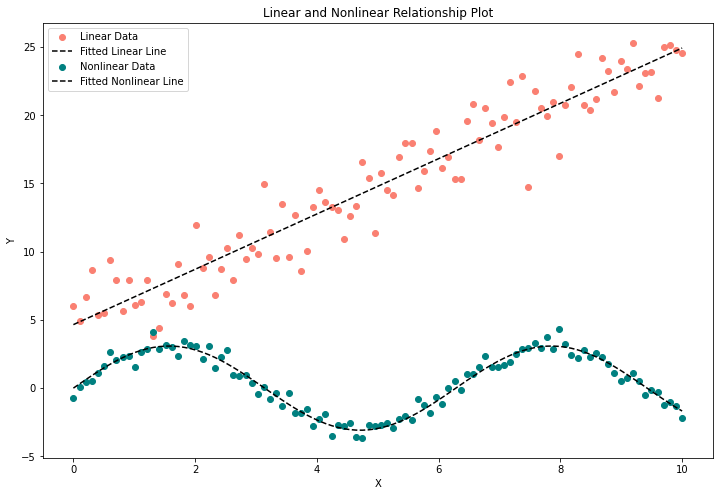

In [ ]:
X_linear = np.linspace(0, 10, 100)
y_linear = 2 * X_linear + 5 + np.random.normal(0, 2, 100)

X_nonlinear = np.linspace(0, 10, 100)
y_nonlinear = 3 * np.sin(X_nonlinear) + np.random.normal(0, 0.5, 100)

def linear_function(x, slope, intercept):
    return slope * x + intercept

def nonlinear_function(x, amplitude):
    return amplitude * np.sin(x)

params_linear, _ = curve_fit(linear_function, X_linear, y_linear)
params_nonlinear, _ = curve_fit(nonlinear_function, X_nonlinear, y_nonlinear)

plt.figure(figsize=(12, 8))

plt.scatter(X_linear, y_linear, label='Linear Data', color='salmon')
plt.plot(X_linear, linear_function(X_linear, *params_linear), linestyle='--', color='black', label='Fitted Linear Line')

plt.scatter(X_nonlinear, y_nonlinear, label='Nonlinear Data', color='teal')
plt.plot(X_nonlinear, nonlinear_function(X_nonlinear, *params_nonlinear), linestyle='--', color='black', label='Fitted Nonlinear Line')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear and Nonlinear Relationship Plot')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import numpy as np

#select number of days
num_days = 365

#select how much you want to spend on each channel
#this will be multiplied by a number between [0, 1]
tv_spend_mult = 1000
digital_spend_mult = 500
print_spend_mult = 300

#set a start date
start_date = pd.to_datetime("2023-01-01")
end_date = start_date + pd.Timedelta(num_days-1, "D")

marketing_data = pd.DataFrame({
 "TV": np.random.rand(num_days) * tv_spend_mult,
 "Digital": np.random.rand(num_days) * digital_spend_mult,
 "Print": np.random.rand(num_days) * print_spend_mult,
  }, index=pd.date_range(start_date, end_date))

In [ ]:
tv_roas = 2
digital_roas = 1.5
print_roas = 1
intercept = 5
error_mult = 50
marketing_data["Revenue"] = (
    intercept
    + tv_roas * marketing_data["TV"]
    + digital_roas * marketing_data["Digital"]
    + print_roas * marketing_data["Print"]
    + np.random.randn(num_days) * error_mult
)

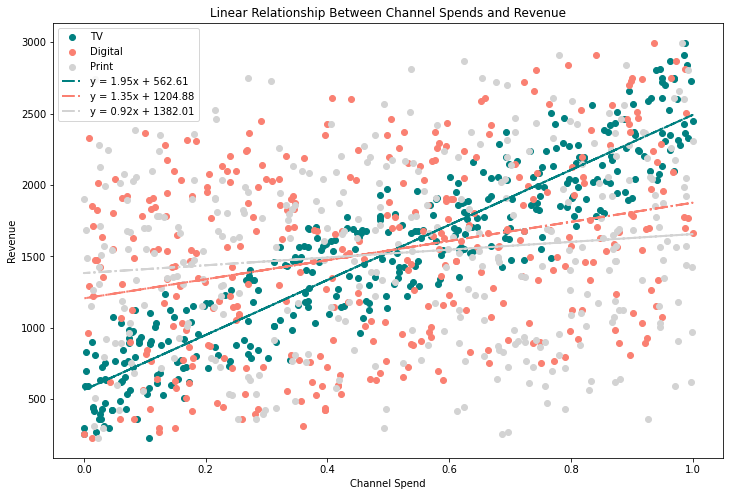

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(marketing_data[["TV", "Digital", "Print"]])

fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(scaled_data[:, 0], marketing_data["Revenue"], label="TV", color="teal")
ax.scatter(scaled_data[:, 1], marketing_data["Revenue"], label="Digital", color="salmon")
ax.scatter(scaled_data[:, 2], marketing_data["Revenue"], label="Print", color="lightgray")
colors = ["teal", "salmon", "lightgray"]
for i, channel in enumerate(["TV", "Digital", "Print"]):
    x = scaled_data[:, i]
    y = marketing_data["Revenue"]
    slope, intercept = np.polyfit(x, y, 1)
    unscaled_slope = slope * scaler.scale_[i]
    line = f"y = {unscaled_slope:.2f}x + {intercept:.2f}"
    ax.plot(x, slope * x + intercept, label=line, ls="-.", linewidth=2, color=colors[i])

ax.set_xlabel("Channel Spend")
ax.set_ylabel("Revenue")
ax.set_title("Linear Relationship Between Channel Spends and Revenue")

ax.legend()

plt.show()


In [ ]:
weekly_marketing_df = marketing_data.resample('W-Mon').sum()

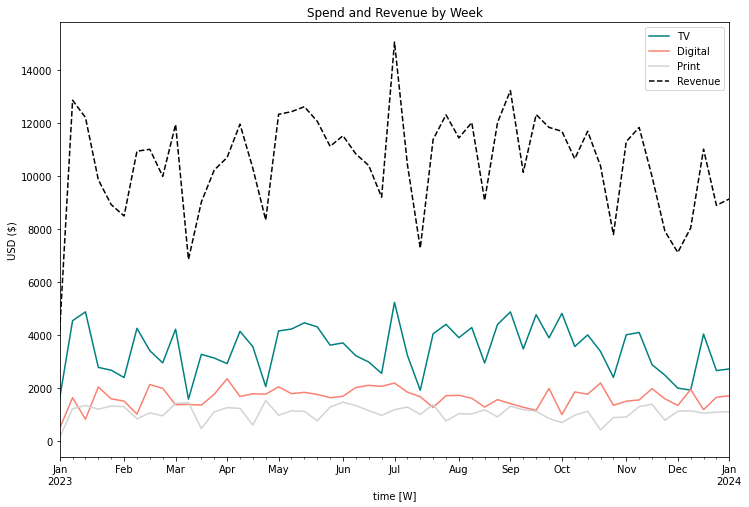

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
weekly_marketing_df["TV"].plot(ax=ax, color="teal")
weekly_marketing_df["Digital"].plot(ax=ax, color="salmon")
weekly_marketing_df["Print"].plot(ax=ax, color="lightgrey")
weekly_marketing_df["Revenue"].plot(ax=ax, color="black", ls="--")
ax.set_title("Spend and Revenue by Week")
ax.set_xlabel("time [W]")
ax.set_ylabel("USD ($)")

ax.legend()
plt.show()

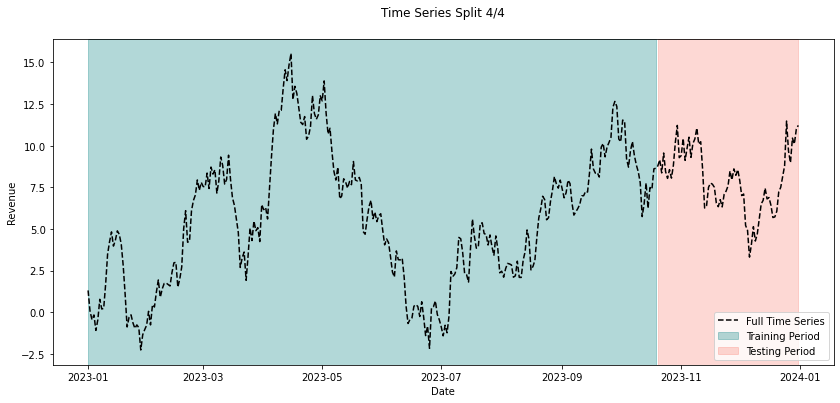

In [ ]:
date_rng = pd.date_range(start=start_date, end=end_date, freq='D')
data = {'Date': date_rng, 'Revenue': np.cumsum(np.random.randn(len(date_rng)))}
time_series_data = pd.DataFrame(data)
time_series_data.set_index('Date', inplace=True)

def animate_splits(frame, ax, n_splits):
    ts_cv = TimeSeriesSplit(n_splits=n_splits)

    train_index, test_index = list(ts_cv.split(time_series_data))[frame]
    train_data, test_data = time_series_data.iloc[train_index], time_series_data.iloc[test_index]

    ax.clear()
    ax.plot(time_series_data.index, time_series_data['Revenue'], label='Full Time Series', color='black', ls='--')

    ax.axvspan(train_data.index[0], train_data.index[-1], alpha=0.3, color='teal', label='Training Period')
    ax.axvspan(test_data.index[0], test_data.index[-1], alpha=0.3, color='salmon', label='Testing Period')

    ax.set_xlabel('Date')
    ax.set_ylabel('Revenue')

    ax.set_title(f'Time Series Split {frame + 1}/{n_splits}', y=1.05)

    ax.legend().remove()

    ax.legend(loc='lower right')

fig, ax = plt.subplots(figsize=(14, 6))
fig.patch.set_facecolor('white')

ani = FuncAnimation(fig, animate_splits, fargs=(ax, 4), frames=4, repeat=False)

ani.save('timeseries_splits_animation.gif', writer='pillow', fps=1)
plt.show()


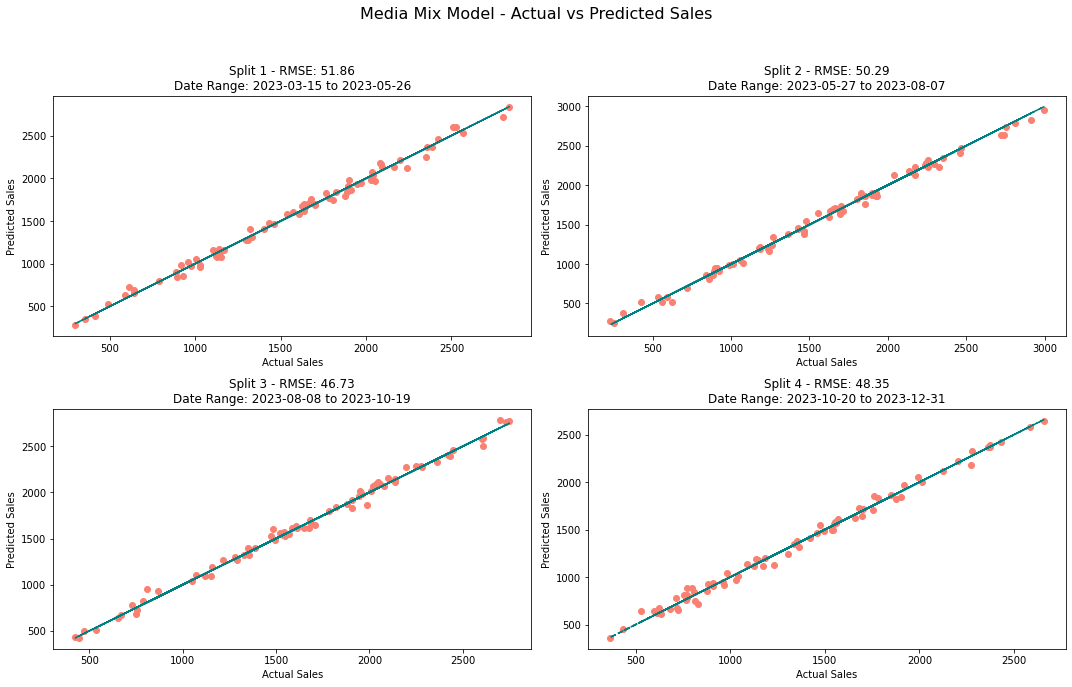

In [ ]:
n_splits = 4
ts_cv = TimeSeriesSplit(n_splits=n_splits)

rmse_scores = []
r2_scores = []

fig, axes = plt.subplots(n_splits // 2, 2, figsize=(15, 10))
fig.suptitle('Media Mix Model - Actual vs Predicted Sales', fontsize=16)

for idx, (train_index, test_index) in enumerate(ts_cv.split(marketing_data)):
    train_data, test_data = marketing_data.iloc[train_index], marketing_data.iloc[test_index]
    
    X_train, y_train = train_data[['TV', 'Digital', 'Print']], train_data['Revenue']
    model = LinearRegression()
    model.fit(X_train, y_train)

    X_test, y_test = test_data[['TV', 'Digital', 'Print']], test_data['Revenue']
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = model.score(X_test, y_test)

    rmse_scores.append(np.sqrt(mse))
    r2_scores.append(r2)

    row, col = divmod(idx, 2)
    axes[row, col].scatter(y_test, y_pred, color='salmon', label="Actual vs Predicted")
    axes[row, col].plot(y_test, y_test, color='teal', ls="--", label="Perfect Prediction")
    axes[row, col].set_xlabel('Actual Sales')
    axes[row, col].set_ylabel('Predicted Sales')

    date_range = f"{test_data.index.min().strftime('%Y-%m-%d')} to {test_data.index.max().strftime('%Y-%m-%d')}"

    axes[row, col].set_title(f'Split {idx + 1} - RMSE: {np.sqrt(mse):.2f}\nDate Range: {date_range}')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [ ]:
X = marketing_data[['TV', 'Digital', 'Print']]
y = marketing_data['Revenue']

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

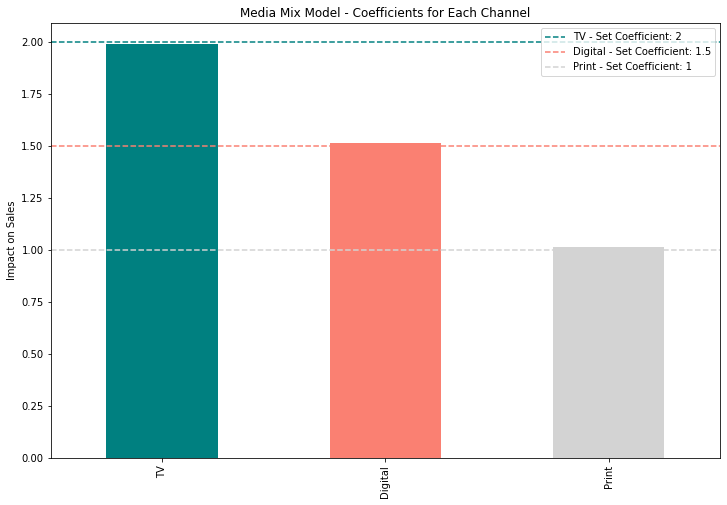

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
coefficients = pd.Series(model.coef_, index=['TV', 'Digital', 'Print'])
coefficients.plot(kind='bar', color=['teal', 'salmon', 'lightgrey'])
ax.axhline(y=2, color='teal', linestyle='--', label='TV - Set Coefficient: 2')
ax.axhline(y=1.5, color='salmon', linestyle='--', label='Digital - Set Coefficient: 1.5')
ax.axhline(y=1, color='lightgrey', linestyle='--', label='Print - Set Coefficient: 1')

ax.set_title('Media Mix Model - Coefficients for Each Channel')
ax.set_ylabel('Impact on Sales')
ax.legend()
plt.show()
